In [1]:
import torch
import pandas as pd
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [3]:
# load mnist data
from torchvision import datasets, transforms
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert PIL images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize to mean=0.5, std=0.5
])

# Load the MNIST training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Create DataLoaders for batching and shuffling
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 13387767.27it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 522830.71it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1086051.52it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2265762.22it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [6]:
# plot some images
import matplotlib.pyplot as plt
import numpy as np

# Function to show an image tensor
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

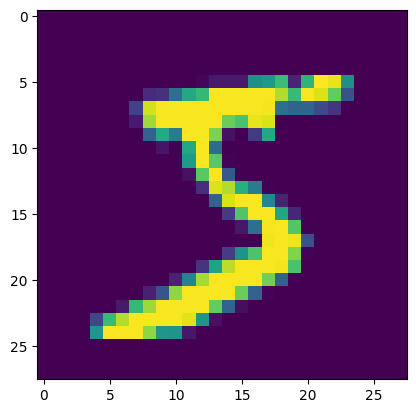

In [7]:
imshow(train_dataset[0][0])

In [15]:
X,y = train_dataset[0]
print(X[0].shape)
print(y)

torch.Size([28, 28])
5


In [65]:
input_size = 28 # each row is input and each row has 28 cols
hidden_size = 128 # hidden layer size
sequence_length = 28 # number of rows
num_layers = 2 # number of layers
num_classes = 10 # number of classes

In [66]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = torch.nn.RNN(input_size,hidden_size,num_layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_size,num_classes)

    def forward(self, x):
        h_0 = torch.zeros(self.num_layers, len(x), self.hidden_size)
        output, _ = self.rnn(x,h_0) # x <- (batch_size, seq_len, input_size) and h_0 <- (numlayers,bathc_size, hidden_size)
        # for each batch i get an output and mujhe unka last lena h sirf
        out = self.fc(output[:,-1,:])
        return out
        

In [67]:
model = RNN(input_size, hidden_size, num_layers, num_classes)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [68]:
epochs = 2
losses = []

for i in range(epochs):
    epoch_loss = 0
    for j, batch in enumerate(train_loader):
        x_batch,y_batch = batch

        optimizer.zero_grad()

        y_pred = model(x_batch.view(32,28,28))

        loss = loss_fn(y_pred, y_batch)

        epoch_loss += loss.item()
        
        loss.backward()
        optimizer.step()

    losses.append(epoch_loss)

    if i % 1 == 0:
        print(f'Epoch: {i}, Loss: {epoch_loss}')



Epoch: 0, Loss: 1291.5903727635741
Epoch: 1, Loss: 551.156873896718


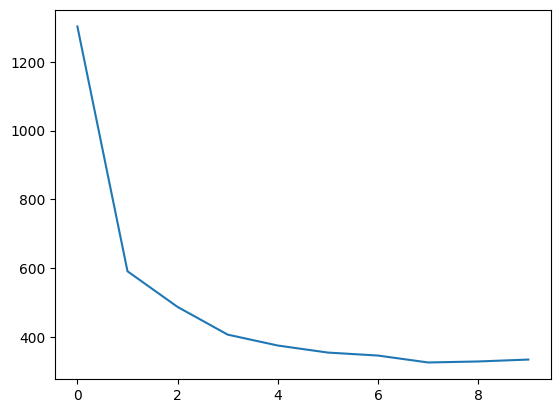

In [38]:
import matplotlib.pyplot as plt
plt.plot(losses)

In [69]:
correct = 0
total = 0
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for j, batch in enumerate(test_loader):
        x_batch,y_batch = batch
        x_batch = x_batch.view(-1,28,28)
        
        outputs = model(x_batch)
        
        # total += len(y_pred)
        # correct += (torch.argmax(y_pred, axis = 1) == y_batch).sum().item()
        # outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += y_batch.size(0)
        n_correct += (predicted == y_batch).sum().item()

# accuracy = correct/total
# print(accuracy*100)

acc = 100.0 * n_correct / n_samples
print(f'Accuracy of the network on the 10000 test images: {acc} %')

Accuracy of the network on the 10000 test images: 90.18 %


In [70]:
n_correct

9018

In [71]:
n_samples

10000